# Dataset Loading

We're going to use the roboflow dataset I've made myself from scratch: ***D6 dices with numbers on the sides***

https://universe.roboflow.com/test-pxksd/d6-dices-with-numbers-on-the-sides

You may consider a few options how to get the data to have an experiment with:

* Download it manually from the link
* Use the roboflow API to download the dataset
* Use the github dataset folder in the project
* Download annotated for YOLOV8 dataset at kaggle:  

In [ ]:
from IPython.display import clear_output, Image

In [ ]:
!curl -L "https://app.roboflow.com/ds/29blVU9hBX?key=5k5B9RiBcV" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
clear_output()

# YOLOV8 Installation

YOLOv8 is a state-of-the-art object detection and image segmentation model created by Ultralytics, the developers of YOLOv5.

You can find all the necessary information about the architecture here: https://github.com/ultralytics/ultralytics

In [ ]:
%pip install ultralytics==8.0.20

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/data.yaml epochs=50 imgsz=800 plots=True

100% 21.5M/21.5M [00:00<00:00, 81.0MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/data.yaml, epochs=50, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False,

# Training results visualization

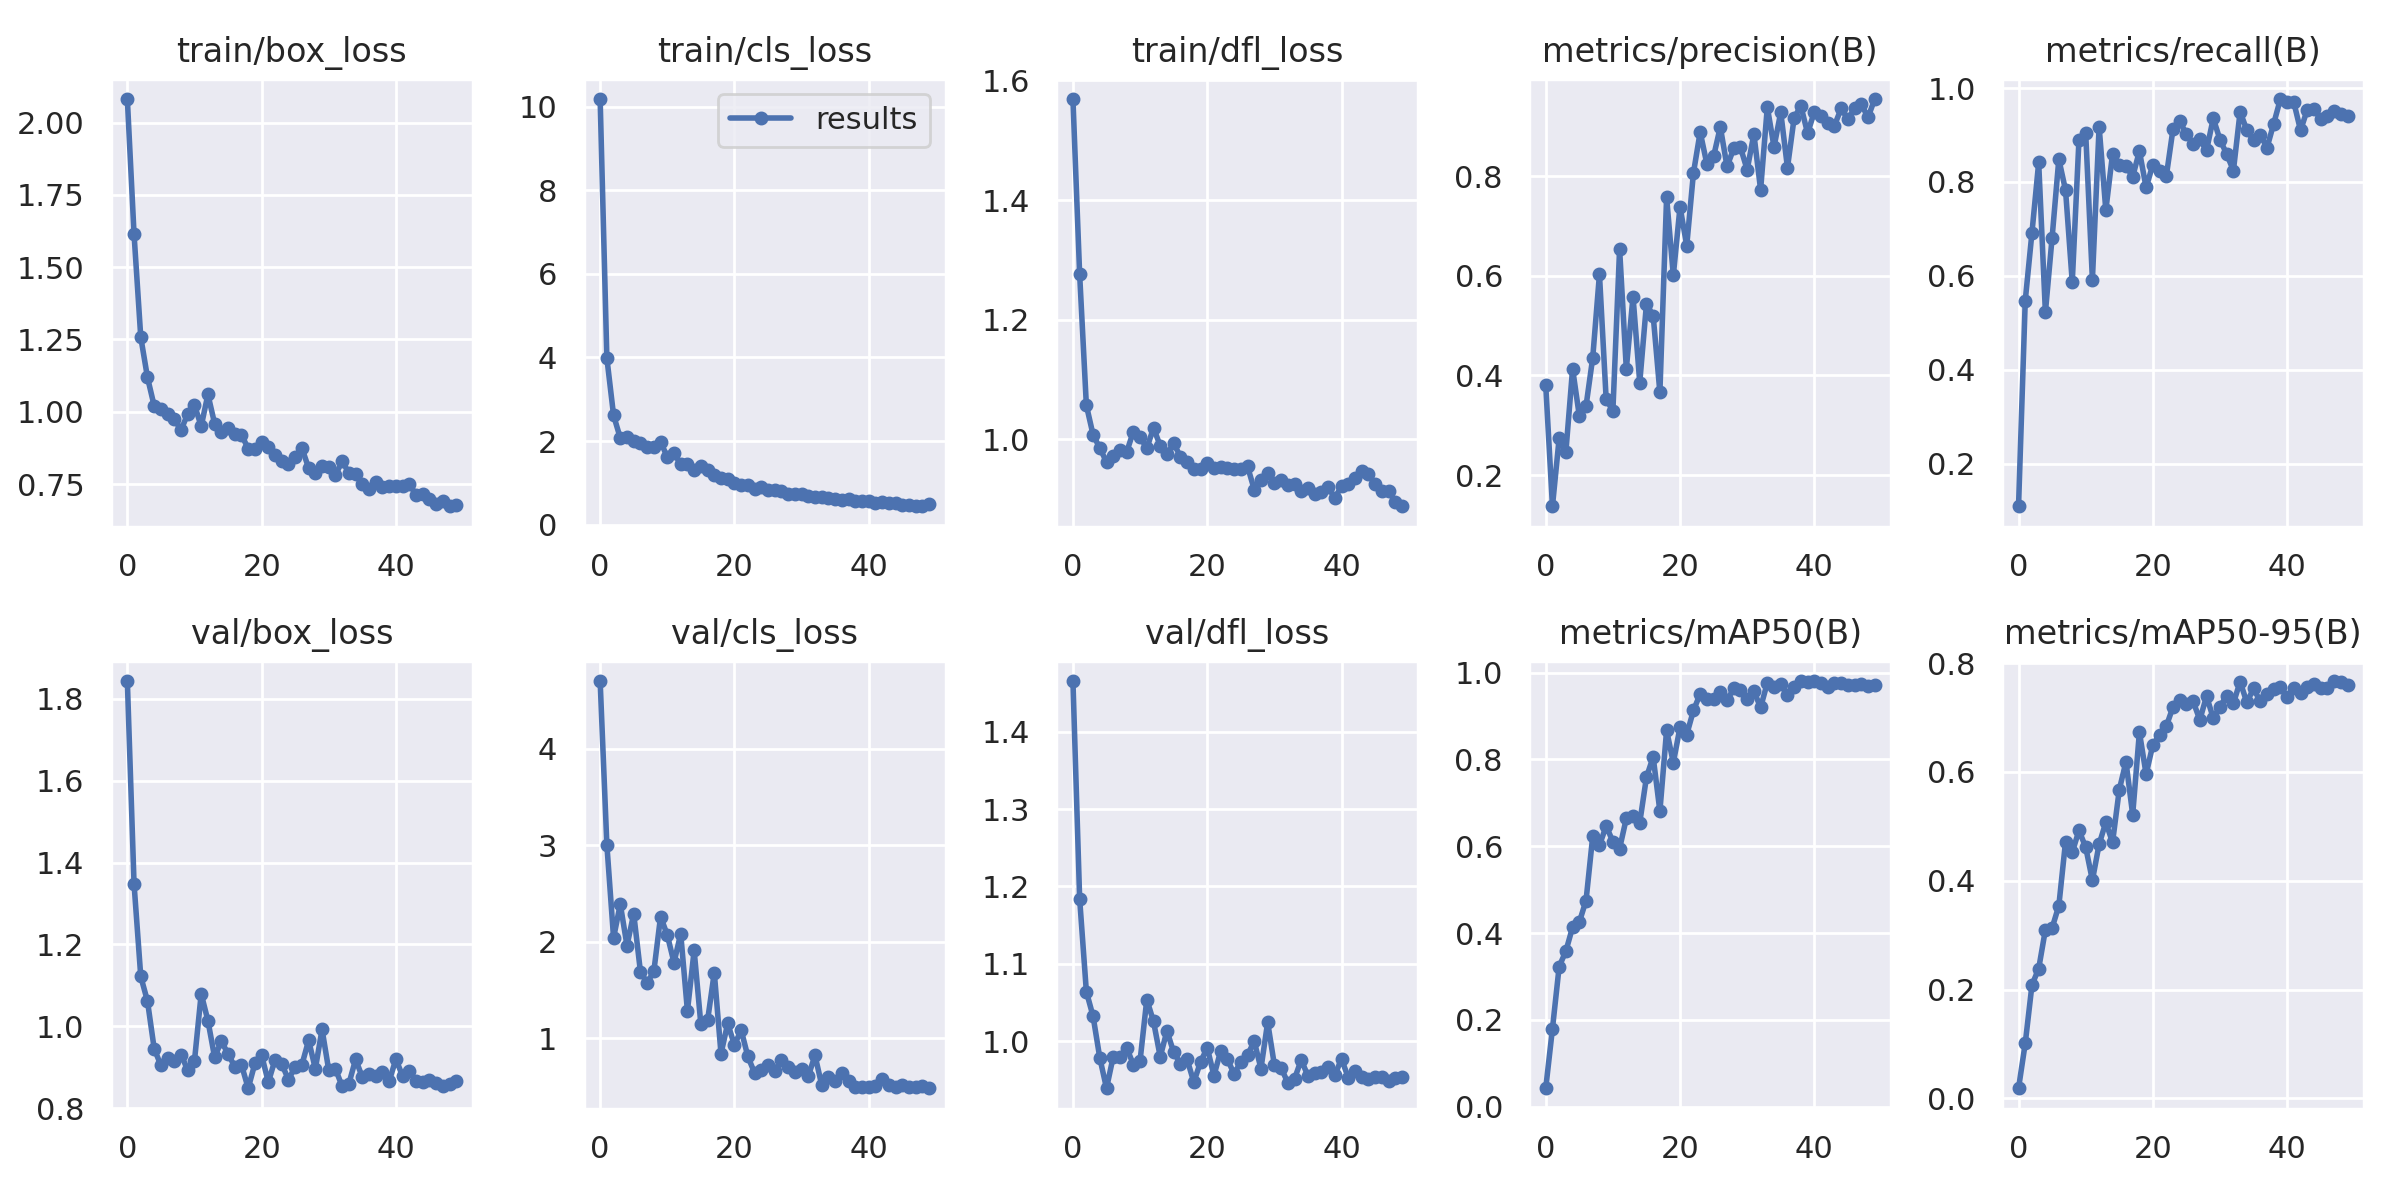

In [ ]:
Image('/content/runs/detect/train/results.png', width=900)

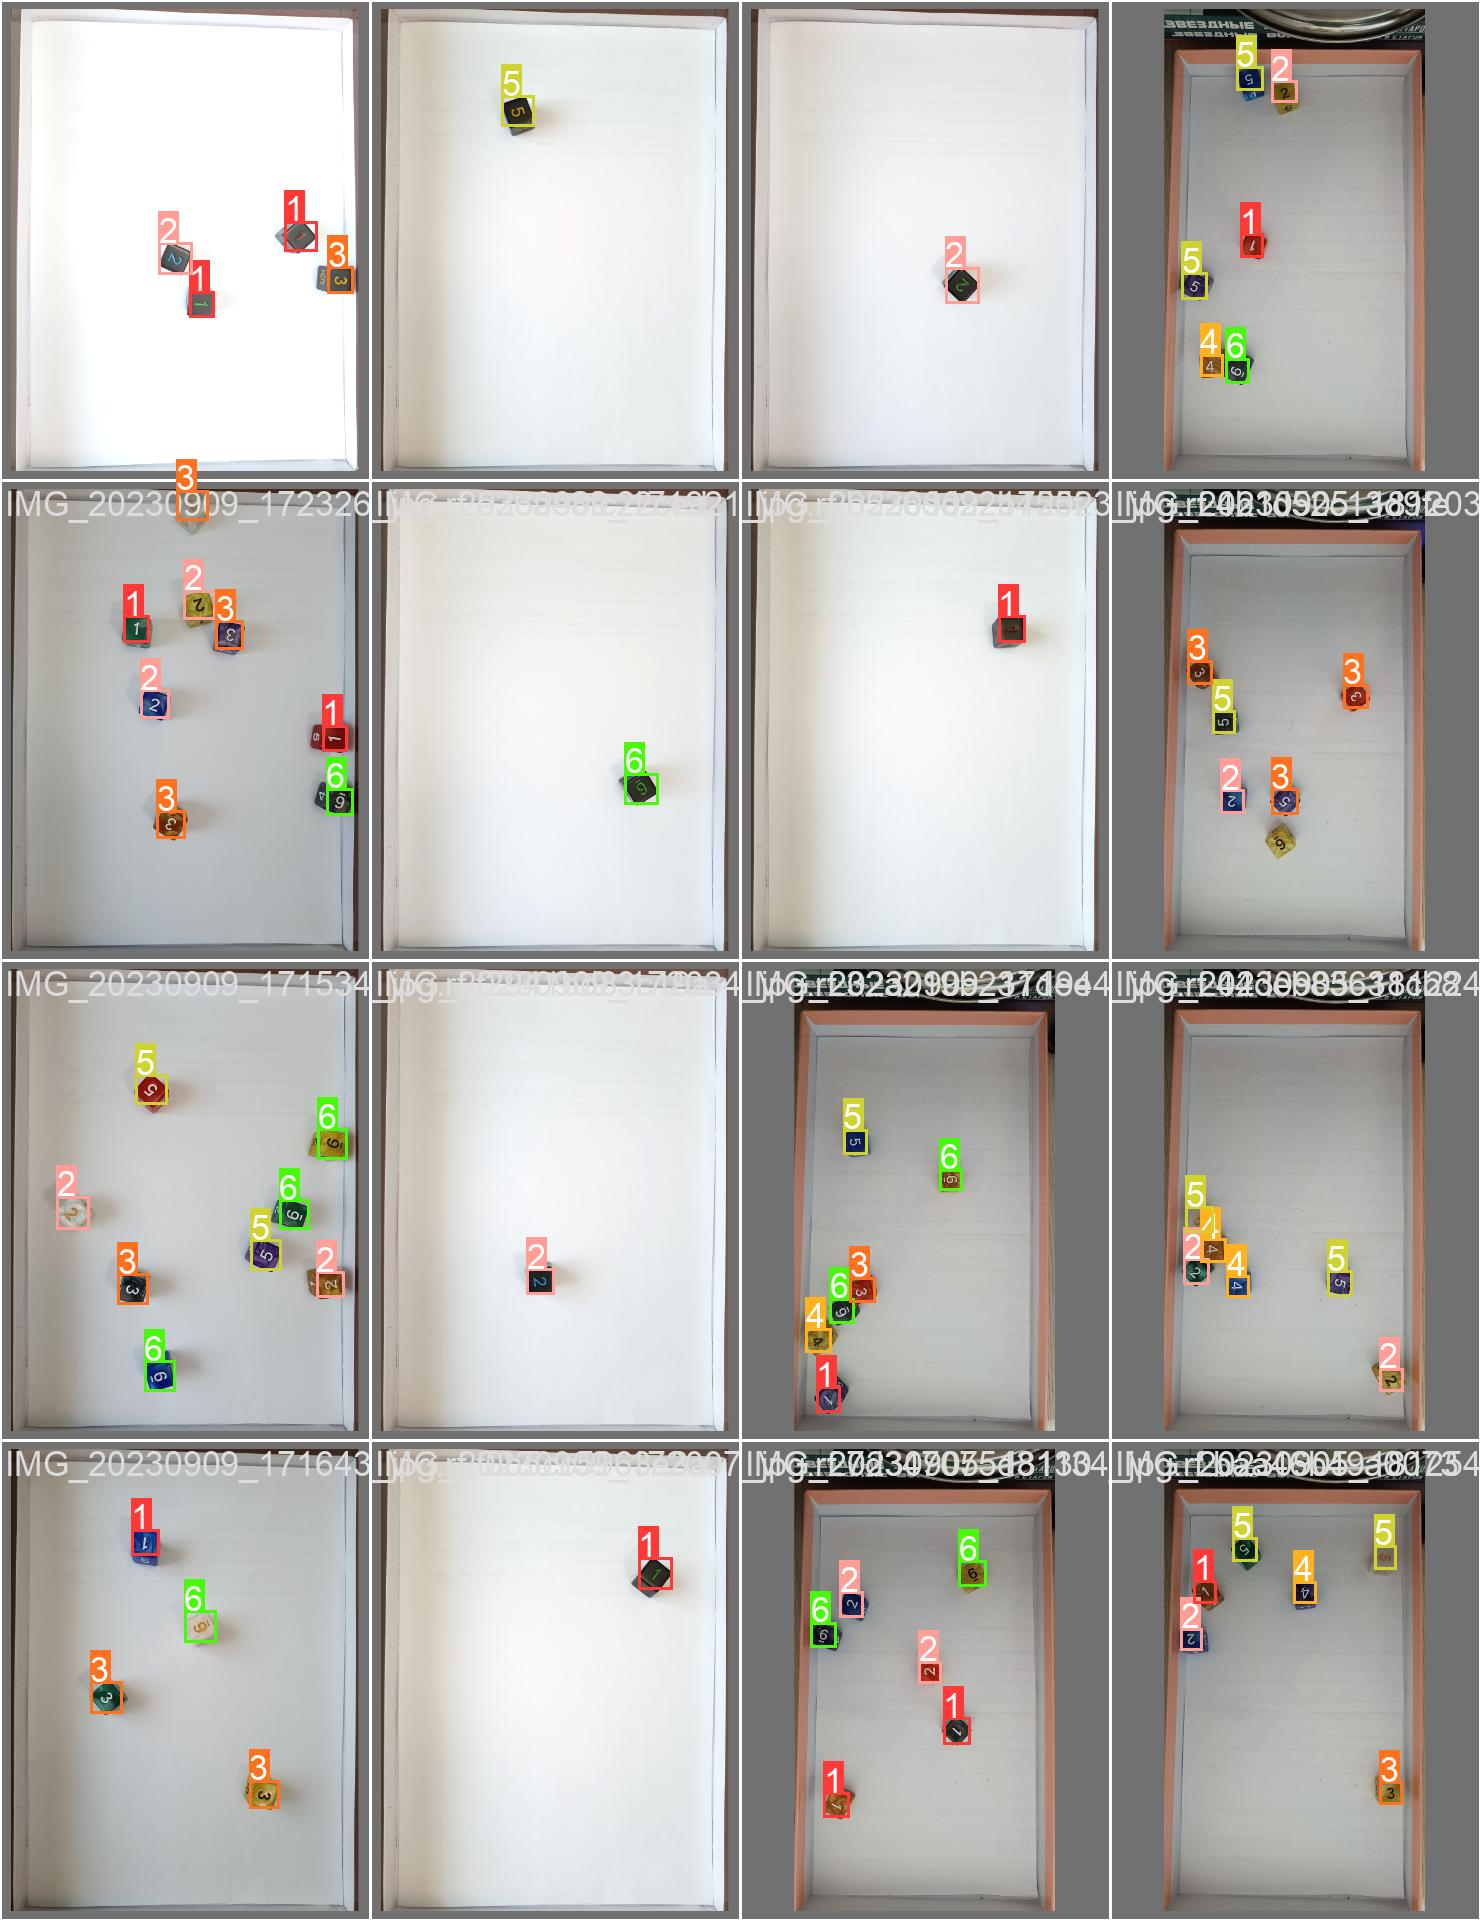

In [ ]:
Image('/content/runs/detect/train/val_batch0_labels.jpg', width=900)

In [ ]:
Image('/content/runs/detect/train/F1_curve.png', width=900)

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

In [ ]:
Image('/content/runs/detect/train/PR_curve.png', width=900)

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

# Model Evaluation
## Static Images

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.399 source=/content/valid/images save=True

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/cfg/__init__.py", line 230, in entrypoint
    model = YOLO(model)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/model.py", line 60, in __init__
    {'.pt': self._load, '.yaml': self._new}[suffix](model)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/model.py", line 90, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 384, in attempt_load_one_weight
    ckpt = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 332, in torch_safe_load
    return torch.load(file, map_location='cpu')  # load
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 791, in load
    with _open_file_lik

In [ ]:
import pathlib

VAL_IMG_PATH_YOLO8 = pathlib.Path('/content/runs/detect/predict')

In [ ]:
import random

Image(filename=random.sample(list(VAL_IMG_PATH_YOLO8.glob('*.jpg')), k=1)[0], width=900)

ValueError: ignored

## Video evaluation

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/videos/D6_with_numbers imgsz=1280 save=True conf=0.4